In [64]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from keras import layers, losses, utils, optimizers
from keras.datasets import cifar10

### Load the CIFAR10 dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#### Show some samples

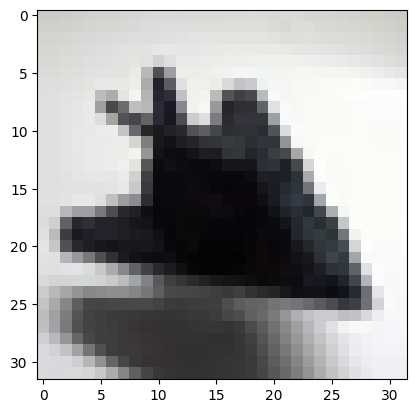

In [47]:
plt.imshow(train_images[np.random.randint(0, 50)])

### Generator

In [61]:
def Generator():
    generator = keras.Sequential()

    # input dense layer
    generator.add(layers.Dense(8 * 8 * 128, use_bias=False, input_shape=(100,)))
    generator.add(layers.LeakyReLU(alpha=0.2))
    generator.add(layers.Reshape((8, 8, 128)))

    # upsampling 1
    generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    generator.add(layers.LeakyReLU(alpha=0.2))

    # upsampling 2
    generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    generator.add(layers.LeakyReLU(alpha=0.2))

    # generator image output
    generator.add(layers.Conv2D(3, (8, 8), padding="same", activation="tanh"))

    return generator



#### Generator random output with no training

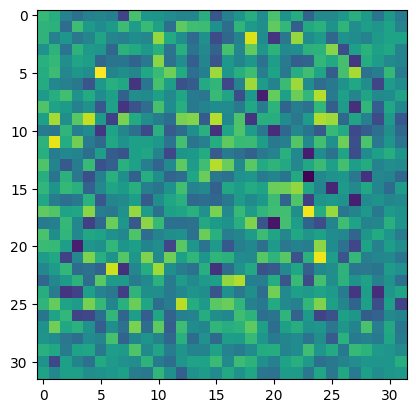

In [63]:
generator = Generator()

noise = tf.random.normal([1, 100])
generated_random_image = generator(noise, training=False)

plt.imshow(generated_random_image[0, :, :, 0])

### Discriminator

In [ ]:
def Discriminator():
    discriminator = keras.Sequential()

    discriminator.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same", input_shape=[32, 32, 3]))
    discriminator.add(layers.LeakyReLU(alpha=0.2))
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"))
    discriminator.add(layers.LeakyReLU(alpha=0.2))
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Flatten())
    discriminator.add(layers.Dense(1, activation="sigmoid"))

    return discriminator



### Connect Generator and Discriminator to GAN

In [ ]:
def CifarGAN(generator, discriminator):
    discriminator.trainable = False

    gan = keras.Sequential()
    gan.add(generator)
    gan.add(discriminator)

    gan.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.0002, beta_1=0.5))

    return gan

